In [1]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.1 MB/s eta 0:00:00


In [2]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata
# Set the API token
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token
# Model setup
model = "ibm-granite/granite-3.3-8b-instruct"
output = Replicate(
model=model,
replicate_api_token=api_token,
)

In [3]:
import pandas as pd

file_path = "/content/Tingkat Kegemaran Membaca Masyarakat dan Unsur Penyusunnya Menurut Provinsi, 2024.csv"
df = pd.read_csv(file_path)
display(df.head())

,Provinsi,Tingkat Kegemaran Membaca,Frekuensi Membaca,Durasi Membaca1,Jumlah Buku yang Dibaca,Frekuensi Akses Internet,Durasi Akses Internet1
0,Aceh,69.93,5,100,3,5,100
1,Sumatera Utara,68.57,3,100,3,3,100
2,Sumatera Barat,73.30,5,100,3,5,100
3,Riau,70.26,5,100,3,5,100
4,Jambi,68.05,3,100,3,3,100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Provinsi                   39 non-null     object 
 1   Tingkat Kegemaran Membaca  39 non-null     float64
 2   Frekuensi Membaca          39 non-null     int64  
 3   Durasi Membaca1            39 non-null     int64  
 4   Jumlah Buku yang Dibaca    39 non-null     int64  
 5   Frekuensi Akses Internet   39 non-null     int64  
 6   Durasi Akses Internet1     39 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 2.3+ KB


In [5]:
df.describe()

,Tingkat Kegemaran Membaca,Frekuensi Membaca,Durasi Membaca1,Jumlah Buku yang Dibaca,Frekuensi Akses Internet,Durasi Akses Internet1
count,39.000000,39.000000,39.0,39.000000,39.000000,39.0
mean,67.514872,3.974359,100.0,3.358974,4.282051,100.0
std,8.272640,1.012739,0.0,0.777553,0.971941,0.0
min,38.830000,3.000000,100.0,3.000000,3.000000,100.0
25%,65.845000,3.000000,100.0,3.000000,3.000000,100.0
50%,69.530000,3.000000,100.0,3.000000,5.000000,100.0
75%,72.620000,5.000000,100.0,3.000000,5.000000,100.0
max,79.990000,5.000000,100.0,5.000000,5.000000,100.0


In [33]:
reviews = []
for _, row in df.iterrows():
    review = (
        f"{row['Provinsi']}: has a reading interest level of {row['Tingkat Kegemaran Membaca']}, "
        f"reading frequency: {row['Frekuensi Membaca']}, duration: {row['Durasi Membaca1']}, "
        f"{row['Jumlah Buku yang Dibaca']} books read, internet access frequency: {row['Frekuensi Akses Internet']}, "
        f"and internet duration: {row['Durasi Akses Internet1']}."
    )
    reviews.append(review)

reviews_text = "\n".join(reviews)

prompt = f"""
Classify each province's literacy engagement level into one of the following categories:
- High
- Medium
- Low

Return the result in this format:
Provinsi: Level

Example:
Jakarta: High
Banten: Low

Profiles:
{reviews_text}
"""


response = output.invoke(prompt)
print("Granite Model Response:\n")
print(response)


Granite Model Response:

Aceh: Medium
Sumatera Utara: Medium
Sumatera Barat: High
Riau: Medium
Jambi: Medium
Sumatera Selatan: Medium
Bengkulu: Medium
Lampung: Low
Kepulauan Bangka Belitung: High
Kepulauan Riau: High
DKI Jakarta: High
Jawa Barat: High
DI Yogyakarta: High
Jawa Timur: High
Banten: High
Bali: High
Nusa Tenggara Barat: Low
Nusa Tenggara Timur: Medium
Kalimantan Barat: High
Kalimantan Tengah: Low
Kalimantan Selatan: High
Kalimantan Timur: Medium
Kalimantan Utara: High
Sulawesi Utara: Low
Sulawesi Tengah: Low
Sulawesi Selatan: High
Sulawesi Tenggara: Low
Gorontalo: Low
Sulawesi Barat: Low
Maluku: Low
Maluku Utara: Low
Papua Barat: Low
Papua Barat Daya: Low
Papua: Low
Papua Selatan: Low
Papua Tengah: Low
Papua Pegunungan: Low
Indonesia: High


In [39]:
summary_prompt = f"""
You are a data analyst.

From the data below, summarize key trends and differences in reading habits across Indonesian provinces.
Mention how internet access might influence reading interest.

Avoid listing numbers. Focus on overall insights only.

Data:
{reviews_text}
"""

summary_response = output.invoke(summary_prompt)
print("Summary Response:\n")
print(summary_response)

Summary Response:

Across Indonesian provinces, there is a moderate to high interest in reading, with levels generally ranging between 50 and 80. Provinces in Java and some islands in Sumatra and Sulawesi show higher reading interest levels, typically above 70. Conversely, provinces in eastern Indonesia, including Papua and Maluku, exhibit lower reading interest, hovering around 50 to 60. 

Reading frequency is predominantly high, with most provinces reporting a reading frequency of 5 out of 5, indicating regular reading habits. However, a few provinces in eastern Indonesia and some smaller islands have a lower frequency of 3, suggesting less frequent engagement with reading materials.

Duration of reading is consistently high across provinces, with all provinces reporting a duration of 100, implying that when they do read, Indonesians tend to dedicate significant time to it.

In terms of books read, there's a pattern where most provinces report reading 3 books, with a few, notably Kep

In [40]:
recommendation_prompt = f"""
Based on the following data on reading behavior and internet access across provinces,
propose 3 policy recommendations that the Ministry of Education can implement
to improve national reading literacy.

Make sure the recommendations meet the following criteria:
- Data-driven: each recommendation should reflect patterns found in the data.
- Actionable: suggestions should be realistic and feasible to implement.
- Regionally sensitive: tailor recommendations to suit the disparities across provinces.

Provide the output as a **numbered list of short policy statements**, each on a new line.

Data:
{reviews_text}
"""


recommendation_response = output.invoke(recommendation_prompt)
print("Recommendation Response:\n")
print(recommendation_response)

Recommendation Response:

1. Enhance Internet Access in Remote Regions: Based on data, provinces like Papua, Papua Barat Daya, and Papua Tengah show significantly lower reading interest levels, coinciding with limited internet access. The Ministry of Education should collaborate with the Ministry of Communication and Information Technology to improve internet infrastructure in these regions, focusing on increasing internet access frequency and duration. This could involve subsidizing internet service providers for infrastructure development in underserved areas and providing incentives for telecommunication companies to expand coverage.

2. Targeted Reading Programs in Low-Interest Provinces: Provinces such as Gorontalo, Maluku, Maluku Utara, and Nusa Tenggara Barat display lower reading interest levels and frequencies. The Ministry of Education should implement targeted reading initiatives in these provinces, incorporating engaging, locally relevant content and employing community lea

In [41]:
anomaly_prompt = f"""
Analyze the provincial reading data below.

Identify up to 3 provinces with unusual patterns — for example:
- High internet access but low reading engagement
- Low internet access but high reading engagement
- Any other data outliers

For each, list:
1. Province name
2. What makes it an anomaly
3. Brief explanation (1-2 lines only)

Data:
{reviews_text}
"""

anomaly_response = output.invoke(anomaly_prompt)
print("Anomaly Response:\n")
print(anomaly_response)

Anomaly Response:

1. **Aceh**: 
   - Anomaly: Low reading frequency (5) despite having moderate internet access and duration.
   - Explanation: Aceh shows less frequent reading despite similar internet usage patterns to other provinces, suggesting possible socio-cultural factors influencing reading habits.

2. **Kepulauan Riau**:
   - Anomaly: High reading interest (73.69) but moderate reading frequency (5) with fewer books read (3) compared to provinces with similar interest levels.
   - Explanation: There might be a mismatch between high reported interest and actual engagement, possibly due to limited availability of reading materials or other barriers to consistent reading.

3. **Papua Pegunungan**:
   - Anomaly: Extremely low reading interest (38.83) and reading frequency, along with the lowest internet access and usage among listed provinces.
   - Explanation: Papua Pegunungan's remote location and socio-economic challenges likely contribute to very low engagement with reading ac

In [47]:
grouping_prompt = f"""
Given the reading behavior and internet access data below, group the provinces into **3 categories** based on similarities.

For each group, give:
1. A short name (e.g., 'Digital Readers')
2. A one-sentence description
3. The list of provinces in that group

Only use the 5 most distinctive provinces from the data below.
Withoutn any additional text.

Data:
{reviews_text}
"""

grouping_response = output.invoke(grouping_prompt)
print("Grouping Response:\n")
print(grouping_response)

Grouping Response:

1. **Category: Highly Engaged Digital Readers**
   - Description: Provinces with high reading interest levels and consistent reading frequency, coupled with high internet access frequency.
   - Provinces: DKI Jakarta, Jawa Barat, Jawa Tengah, DI Yogyakarta, Jawa Timur, Banten, Bali, Kalimantan Barat, Kalimantan Selatan, Sulawesi Utara, Sulawesi Tengah, Sulawesi Selatan, Nusa Tenggara Barat, Nusa Tenggara Timur, Kepulauan Bangka Belitung, Kepulauan Riau, Indonesia.

2. **Category: Consistent Readers with Moderate Internet Access**
   - Description: Provinces showing regular reading habits and moderate internet usage, with reading interest levels slightly above the national average.
   - Provinces: Aceh, Sumatera Utara, Sumatera Barat, Riau, Jambi, Lampung, Sumatera Selatan, Bengkulu, Kepulauan Riau, Jawa Barat, Jawa Tengah, DI Yogyakarta, Jawa Timur, Banten, Bali, Kalimantan Tengah, Kalimantan Timur, Kalimantan Utara, Sulawesi Utara, Sulawesi Tengah, Sulawesi Selatan

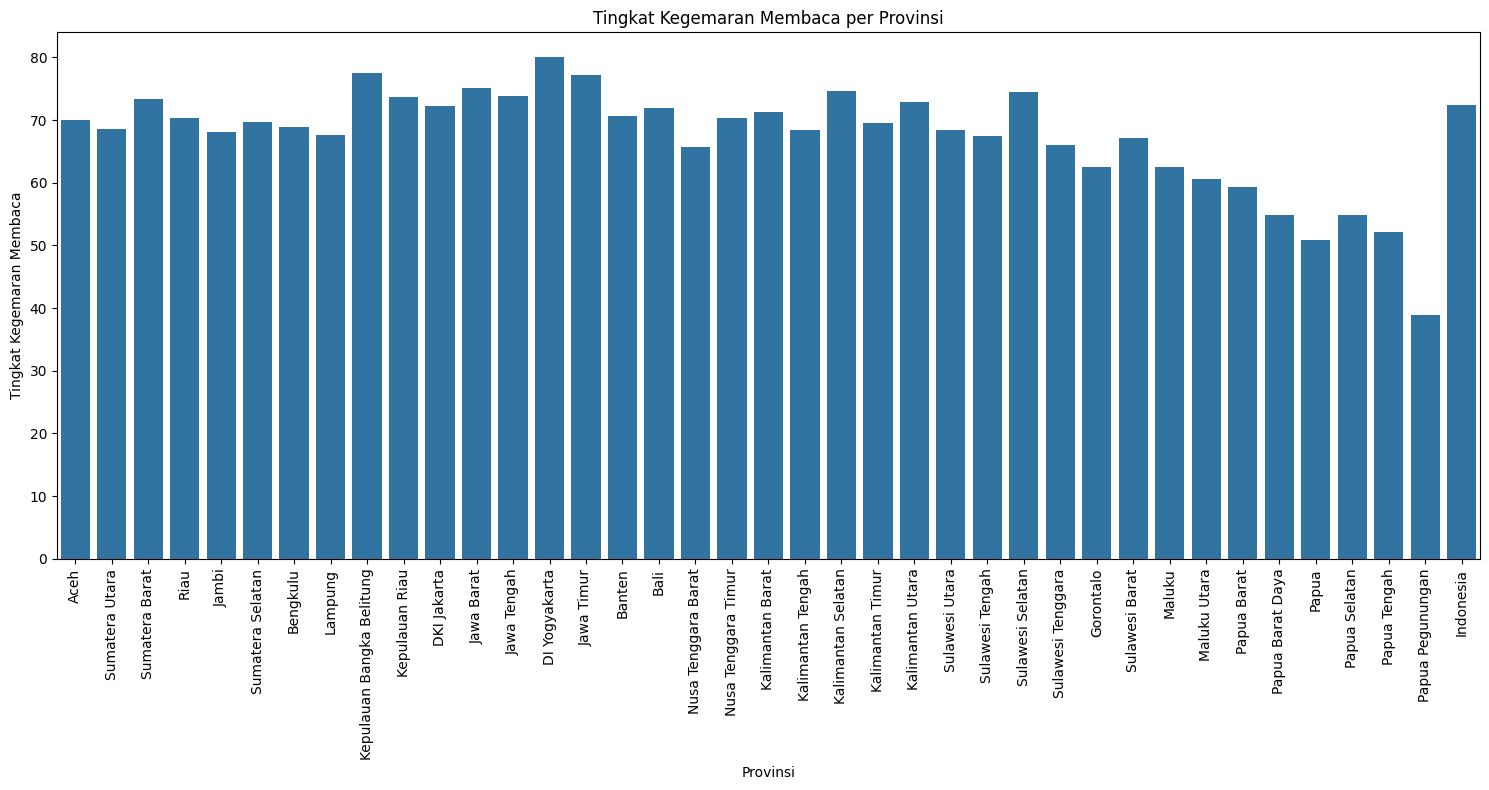

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.barplot(x='Provinsi', y='Tingkat Kegemaran Membaca', data=df)
plt.xticks(rotation=90)
plt.xlabel('Provinsi')
plt.ylabel('Tingkat Kegemaran Membaca')
plt.title('Tingkat Kegemaran Membaca per Provinsi')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2060388314.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Provinsi', y='Tingkat Kegemaran Membaca', data=viz_df, palette='viridis')


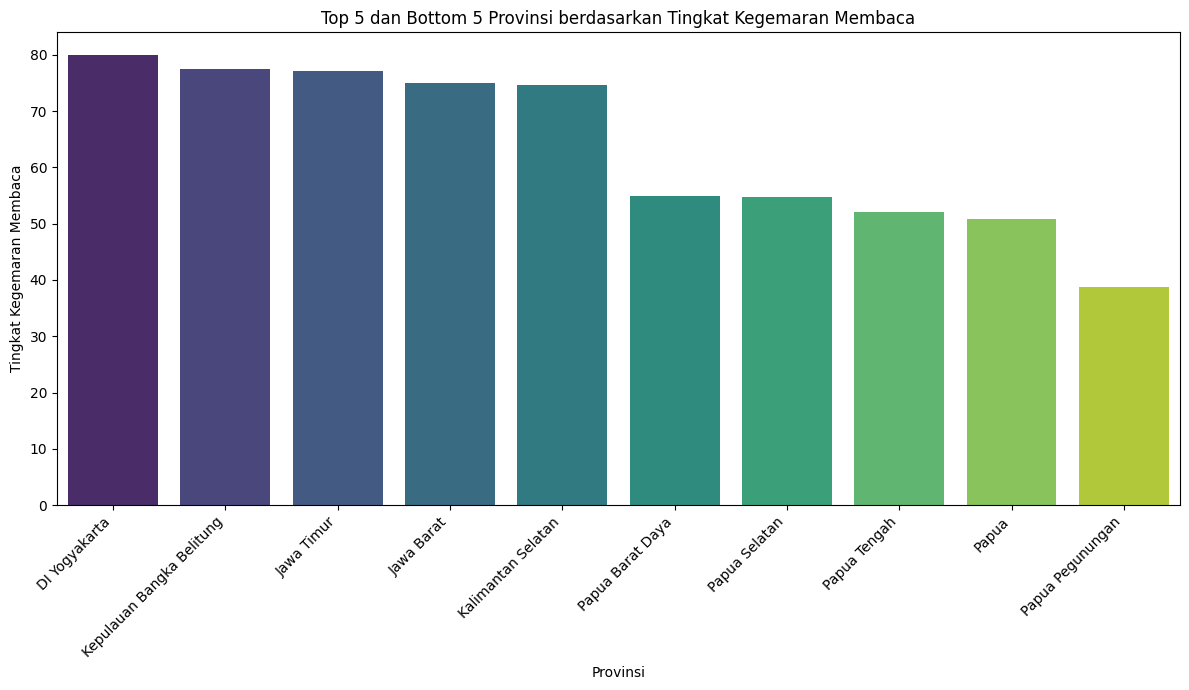

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the dataframe by reading interest level
df_sorted = df.sort_values(by='Tingkat Kegemaran Membaca', ascending=False)

# Select top 5 and bottom 5 provinces
top_5 = df_sorted.head(5)
bottom_5 = df_sorted.tail(5)

# Combine top and bottom provinces for visualization
viz_df = pd.concat([top_5, bottom_5])

plt.figure(figsize=(12, 7))
sns.barplot(x='Provinsi', y='Tingkat Kegemaran Membaca', data=viz_df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Provinsi')
plt.ylabel('Tingkat Kegemaran Membaca')
plt.title('Top 5 dan Bottom 5 Provinsi berdasarkan Tingkat Kegemaran Membaca')
plt.tight_layout()
plt.show()

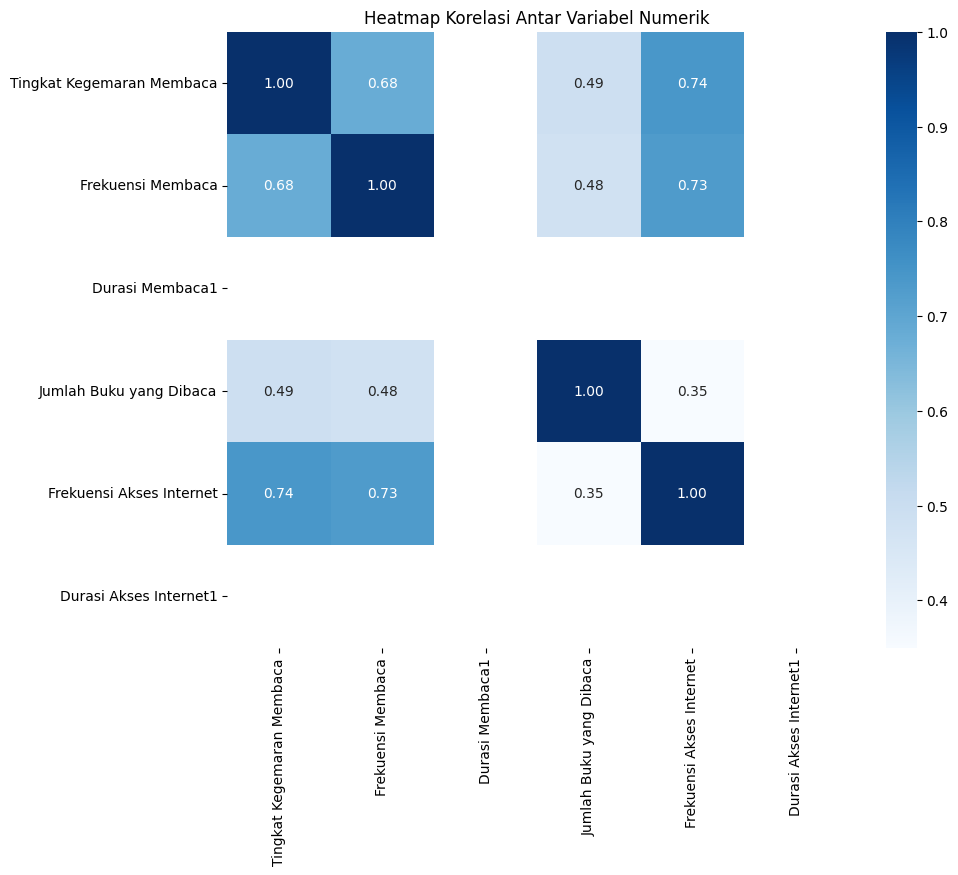

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()